In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
pip install missingno

  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import missingno as msno

In [11]:
loan = pd.read_csv('loans.csv')

In [12]:
loan.shape

(1968819, 34)

Notre base de donnée est constituée de `1 968 819 observations` et `34 variables`. Par suite, nous procèderons à la description des différentes variables de la base.

 **Description des variables de la base de données**
 
* 1 - Loan ID : Identifiant de la transaction
* 2 - LOAN_NAME : Nom du prêt
* 3 -	ORIGINAL_LANGUAGE : Langue parlée
* 4 -	DESCRIPTION : Le champ de description a différentes sous-catégories
* 5 -	DESCRIPTION_TRANSLATED : Description textuelle du projet en anglais, espagnol, français ou russe
* 6 -	FUNDED_AMOUNT : Montant du prêt acheté par les prêteurs Kiva
* 7 -	LOAN_AMOUNT : Montant du prêt qui a été remboursé
* 8 -	STATUS : Status du prêt
* 9 -	IMAGE_ID : Image de l'emprunteur
* 10 - VIDEO_ID : Vidéo dans les proﬁls de prêt et les écritures de journal
* 11 - ACTIVITY_NAME : Activité qui sera réalisée avec le montant financé
* 12 - SECTOR_NAME : Secteur industriel auquel appartient l'activité
* 13 - LOAN_USE : Brève description textuelle de l'utilisation qui sera faite du capital financé
* 14 - COUNTRY_CODE : Code à 2 lettres du pays d'origine de l'emprunteur
* 15 - COUNTRY_NAME : Nom du pays de l'emprunteur
* 16 - TOWN_NAME : Ville du pays de l'emprunteur
* 17 - CURRENCY_POLICY : politique de change
* 18 - CURRENCY_EXCHANGE_COVERAGE_RATE : Taux de couverture de change
* 19 - CURRENCY : Monnaie
* 20 - PARTNER_ID : ID du partenaire de terrain
* 21 - POSTED_TIME : Date à laquelle le prêt a été comptabilisé
* 22 - PLANNED_EXPIRATION_TIME : L'heure à laquelle le prêt est prévu d'expirer
* 23 - DISBURSE_TIME : L'heure à laquelle les fonds du prêt ont été remis aux emprunteurs
* 24 - RAISED_TIME : Le temps d'échéance augmenté 
* 25 - LENDER_TERM : Durée fixée pour le prêteur du prêt
* 26 - NUM_LENDERS_TOTAL : Nombre total de prêteur
* 27 - NUM_JOURNAL_ENTRIES : Le nombre total d'écritures de journal pour le prêt
* 28 - NUM_BULK_ENTRIES : Le nombre total d'entrées automatisées ou «groupées»
* 29 - TAGS : Commentaire de l'opération
* 30 - BORROWER_NAMES : nom de l'emprunteur
* 31 - BORROWER_GENDERS : Genre de de l'emprunteur
* 32 - BORROWER_PICTURED : L'emprunteur a-t-il fourni ou non une photo?
* 33 - REPAYMENT_INTERVAL : Durée fixée pour le remboursement du prêt
* 34 - DISTRIBUTION_MODEL : 

In [6]:
loan.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,...,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,1827392,Nelie,English,Nelie is married and works hard to support her...,Nelie is married and works hard to support her...,525.0,525.0,funded,3241689.0,NaN,...,8.0,15,2,1,#Woman-Owned Business,Nelie,female,true,monthly,field_partner
1,339740,Zoila Rosa,Spanish,La Señora Zoila es socia del banco comunal El ...,Zoila is a member of 'El Cisne' (The Swan) com...,675.0,675.0,funded,878599.0,NaN,...,8.0,23,2,1,NaN,Zoila Rosa,female,true,monthly,field_partner
2,1782205,Rosalinda,English,"Rosalinda is a married woman, who is 41 years ...","Rosalinda is a married woman, who is 41 years ...",400.0,400.0,funded,3180067.0,NaN,...,11.0,5,2,1,NaN,Rosalinda,female,true,monthly,field_partner
3,958277,Restita,English,"This is Restita, who is 54 years old. She owns...","This is Restita, who is 54 years old. She owns...",875.0,875.0,funded,1994112.0,NaN,...,7.0,9,2,1,NaN,Restita,female,true,monthly,field_partner
4,1214975,Hejazi,English,"Hejazi, who appears in the photo, is 30 years ...","Hejazi, who appears in the photo, is 30 years ...",1000.0,1000.0,funded,2408080.0,NaN,...,28.0,22,1,1,"#Parent, user_favorite, #Biz Durable Asset, us...",Hejazi,male,true,monthly,field_partner


Avec cette prévisualisation et la description des variables de la base de données, on peut clairement identifier la nature de ces dernières à savoir si elles sont *quantitatives* ou *qaulitatives* et aussi au format *date*.
Afin de voir la considération que python fait de nos variables, nous allons affiché les informations de la base de données.

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968819 entries, 0 to 1968818
Data columns (total 34 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   LOAN_ID                          int64  
 1   LOAN_NAME                        object 
 2   ORIGINAL_LANGUAGE                object 
 3   DESCRIPTION                      object 
 4   DESCRIPTION_TRANSLATED           object 
 5   FUNDED_AMOUNT                    float64
 6   LOAN_AMOUNT                      float64
 7   STATUS                           object 
 8   IMAGE_ID                         float64
 9   VIDEO_ID                         float64
 10  ACTIVITY_NAME                    object 
 11  SECTOR_NAME                      object 
 12  LOAN_USE                         object 
 13  COUNTRY_CODE                     object 
 14  COUNTRY_NAME                     object 
 15  TOWN_NAME                        object 
 16  CURRENCY_POLICY                  object 
 17  CURRENCY

Comme on peut le voir, python considère nos variable date comme qualitative. Ce qui est tout à fait normal étant donné leur format.

Nous allons par la suite transformer ces variables dates en informations utilent pour les analyses à venir. Aussi, pour les autres variables de type object, nous allons les re-codifier en précisant clairement leur type. Cette recodification permettra mieux manipuler les données.

` ***Définition des types des varibales*** `
* Variables de type date

In [4]:
print(' le type de POSTED_TIME est :', type(loan['POSTED_TIME']),
      '\n le type de PLANNED_EXPIRATION_TIME est :', type(loan['PLANNED_EXPIRATION_TIME']),
      '\n le type de DISBURSE_TIME est :', type(loan['DISBURSE_TIME']),
      '\n le type de RAISED_TIME est :', type(loan['RAISED_TIME']))

 le type de POSTED_TIME est : <class 'pandas.core.series.Series'> 
 le type de PLANNED_EXPIRATION_TIME est : <class 'pandas.core.series.Series'> 
 le type de DISBURSE_TIME est : <class 'pandas.core.series.Series'> 
 le type de RAISED_TIME est : <class 'pandas.core.series.Series'>


Comme on le voit avec cette sortie, nos variables dates sont considérées commes de `series` par python. Il est à noter que sur
python, ce type de variable est un tableau étiqueté unidimensionnel capable de contenir n'importe quel type de données (entiers, chaînes, nombres à virgule flottante, objets Python, etc.).
Dans la suite nous allons convertir ces variables en variables datetime pour en extraire l'année. Cette conversion nous sera d'un grand avantage dans les prochaines analyses.

In [21]:
# Conversion des variables en datetime

loan["POSTED_TIME"] = pd.to_datetime(loan["POSTED_TIME"])
loan["PLANNED_EXPIRATION_TIME"] = pd.to_datetime(loan["PLANNED_EXPIRATION_TIME"])
loan["DISBURSE_TIME"] = pd.to_datetime(loan["DISBURSE_TIME"])
loan["RAISED_TIME"] = pd.to_datetime(loan["RAISED_TIME"])

loan["POSTED_TIME"].dt
loan["PLANNED_EXPIRATION_TIME"].dt
loan["DISBURSE_TIME"].dt
loan["RAISED_TIME"].dt

In [22]:
# Ajout des variables années à notre dataset
loan["POSTED_DATE"] = loan["POSTED_TIME"].dt.year
loan["PLANNED_EXPIRATION_DATE"] = loan["PLANNED_EXPIRATION_TIME"].dt.year
loan["DISBURSE_date"] = loan["DISBURSE_TIME"].dt.year
loan["RAISED_date"] = loan["RAISED_TIME"].dt.year

In [23]:
df1 = pd.crosstab(loan["POSTED_DATE"],"freq")
df2 = pd.crosstab(loan["PLANNED_EXPIRATION_DATE"],"freq")
df3 = pd.crosstab(loan["DISBURSE_date"],"freq")
df4 = pd.crosstab(loan["RAISED_date"],"freq")

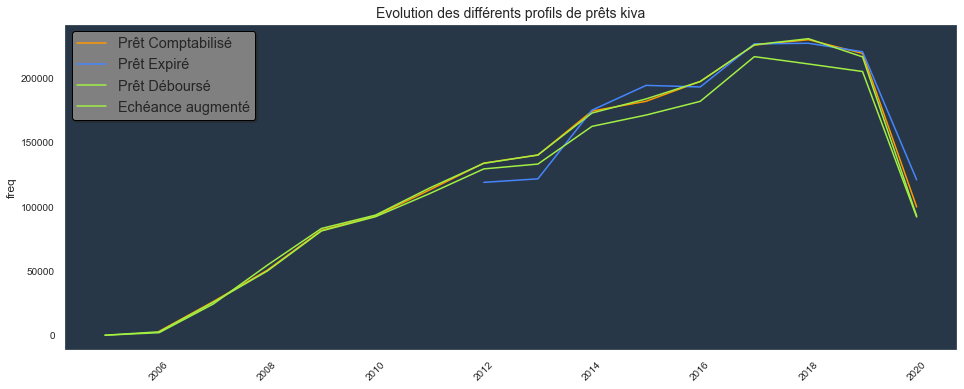

In [9]:
plt.figure(figsize=(16,6))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':10,'ytick.labelsize':10})
plt.title("Evolution des différents profils de prêts kiva",fontsize = 14)
plt.xticks(rotation=45) # Rotating X tickts by 45 degrees
sns.lineplot(x = df1.index.values, y = df1['freq'] , color = '#ff9900' , label= 'Prêt Comptabilisé')
sns.lineplot(x = df2.index.values, y = df2['freq'] , color = '#4586ff' , label = 'Prêt Expiré')
sns.lineplot(x = df3.index.values, y = df3['freq'] , color = '#a2ef44' , label = 'Prêt Déboursé')
sns.lineplot(x = df4.index.values, y = df4['freq'] , color = '#a2ef44' , label = 'Echéance augmenté')
plt.legend(facecolor= 'grey' , fontsize='large' , edgecolor = 'black' ,shadow=True) # Legend formatting
plt.show()

De cette sortie, on a retrace ainsi les activités de Kiva de sa création en 2005 jusqu'au 20/10/2020. On constate l'année 2018 représente celle où kiva a eu le plus grand nombre d'activité pour tous ces profils de prêts. Toutes fois, il importe de noter que la crise du covid a significativité impacté négativement les activités de kiva.

* Variables catégorielle

In [10]:
var_categoriel = ['LOAN_NAME','ORIGINAL_LANGUAGE','DESCRIPTION','DESCRIPTION_TRANSLATED','STATUS','ACTIVITY_NAME','SECTOR_NAME','LOAN_USE','COUNTRY_CODE','COUNTRY_NAME','TOWN_NAME','CURRENCY_POLICY','CURRENCY_EXCHANGE_COVERAGE_RATE','CURRENCY','TAGS','BORROWER_NAMES','BORROWER_GENDERS','BORROWER_PICTURED','REPAYMENT_INTERVAL','DISTRIBUTION_MODEL']
loan[var_categoriel] = loan[var_categoriel].astype('category')

In [13]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968819 entries, 0 to 1968818
Data columns (total 38 columns):
 #   Column                           Dtype              
---  ------                           -----              
 0   LOAN_ID                          int64              
 1   LOAN_NAME                        category           
 2   ORIGINAL_LANGUAGE                category           
 3   DESCRIPTION                      category           
 4   DESCRIPTION_TRANSLATED           category           
 5   FUNDED_AMOUNT                    float64            
 6   LOAN_AMOUNT                      float64            
 7   STATUS                           category           
 8   IMAGE_ID                         float64            
 9   VIDEO_ID                         float64            
 10  ACTIVITY_NAME                    category           
 11  SECTOR_NAME                      category           
 12  LOAN_USE                         category           
 13  COUNTRY_CODE

Une fois que nous connaissons le type de nos différentes variables, nous allons par suite identifier celles qui ne serons
pas utiles pour nos analyses et les supprimés pour ne retenir que les pertinentes. Comme par exemple, les variables `ACTIVITY_NAME` ne rapporte pas trop d'information étant donnée la disponibilité de la variable `SECTOR_NAME`; également pour la variable `IMAGE_ID`, on va préferé `BORROWER_PICTURED` qui renseigne si l'emprunteur a fourni sa photo ou pas.

In [109]:
var_suprime = ['LOAN_NAME','ORIGINAL_LANGUAGE','IMAGE_ID','DESCRIPTION','ACTIVITY_NAME','TOWN_NAME','CURRENCY_POLICY','TAGS','BORROWER_NAMES']

In [110]:
loan_copy = loan.copy() # On fait copie de la base pour toujours avoir recours à la base source en cas de problème.

In [111]:
loan_copy = loan_copy.drop(var_suprime, axis=1)

In [112]:
loan_copy.shape

(1968819, 29)

## Analyse globale de la base de donnée
L'object de cette partie est de ressortie les caractéristiques globales de la base de données en terme de missing values et duplicates. Par la suite, nous allons procédé à une analyse beaucoup plus fine au niveau de chaque de variable, ce dans l'optique d'identifier les valeurs éventuelles valeurs abérrantes et autres.

* Missing values

<AxesSubplot:>

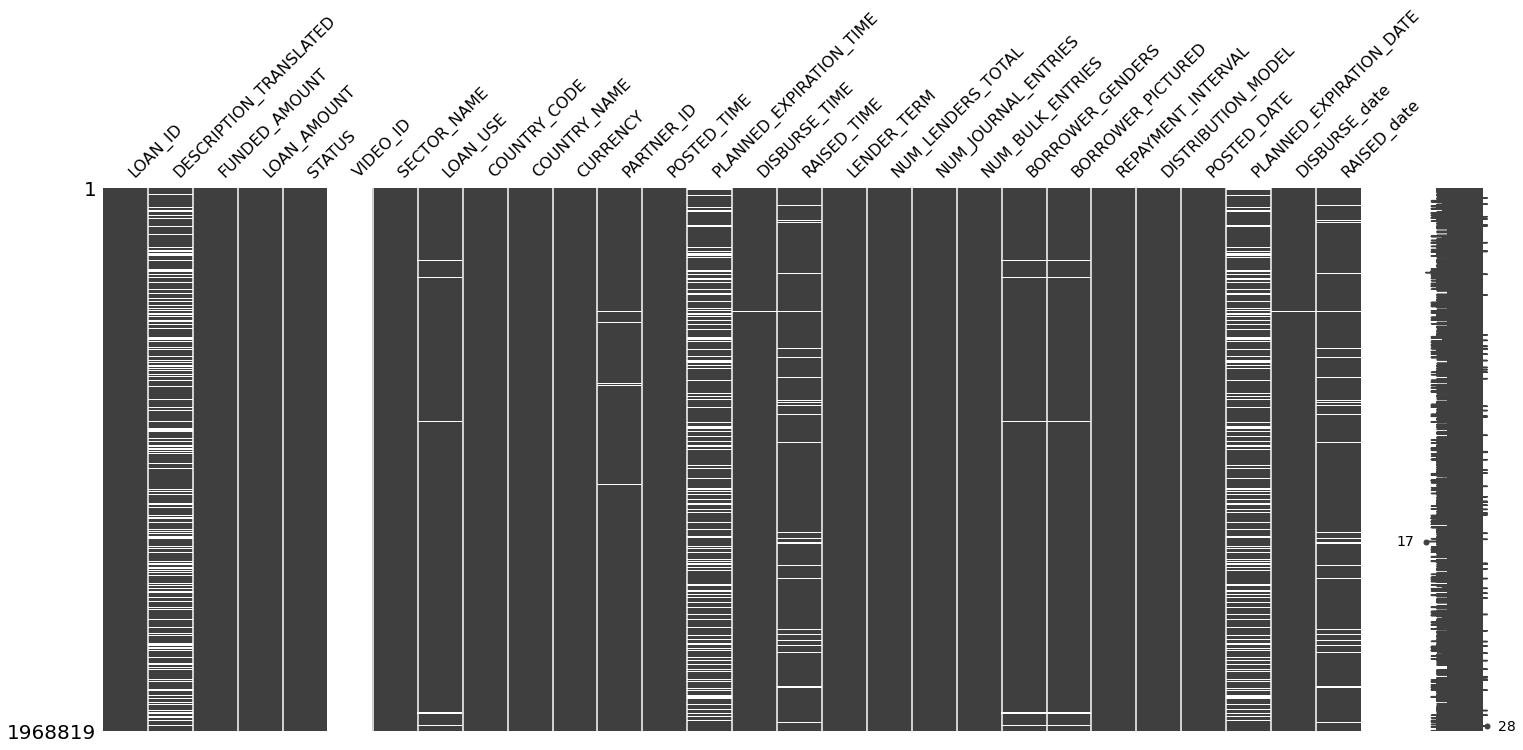

In [60]:
msno.matrix(loan_copy)

L'observation de cette sortie permet de constater que les variables `DESCRIPTION_TRANSLATED`, `VIDEO_ID`, `PLANNED_EXPIRATION_TIME`, `PLANNED_EXPIRATION_DATE`
presentent beaucoup de valeurs manquantes. Etant donné leur faible apport informationnel dans nos analyses,
nous allons nous en débarraser. Par ailleurs, notons aussi le cas de la variable **`CURRENCY_EXCHANGE_COVERAGE_RATE`** qui certe importante pour les analyses mais présente des valeurs manquantes. Pour cette dernière, nous allons la supprimer de la base de donnée et la remplacer par une variable avec un plus grand apport informationnel.En effet, dans la suite du travail, nous allons rechercher un site qui donne les taux d'échanges des différentes monnaies par rapport à l'euro et scrapper cette page pour ajouter cette information à notre base de donnée.

In [113]:
var_supprime2 = ['DESCRIPTION_TRANSLATED','CURRENCY_EXCHANGE_COVERAGE_RATE','VIDEO_ID','PLANNED_EXPIRATION_TIME','PLANNED_EXPIRATION_DATE']

In [114]:
loan_copy = loan_copy.drop(var_supprime2, axis=1)

<AxesSubplot:>

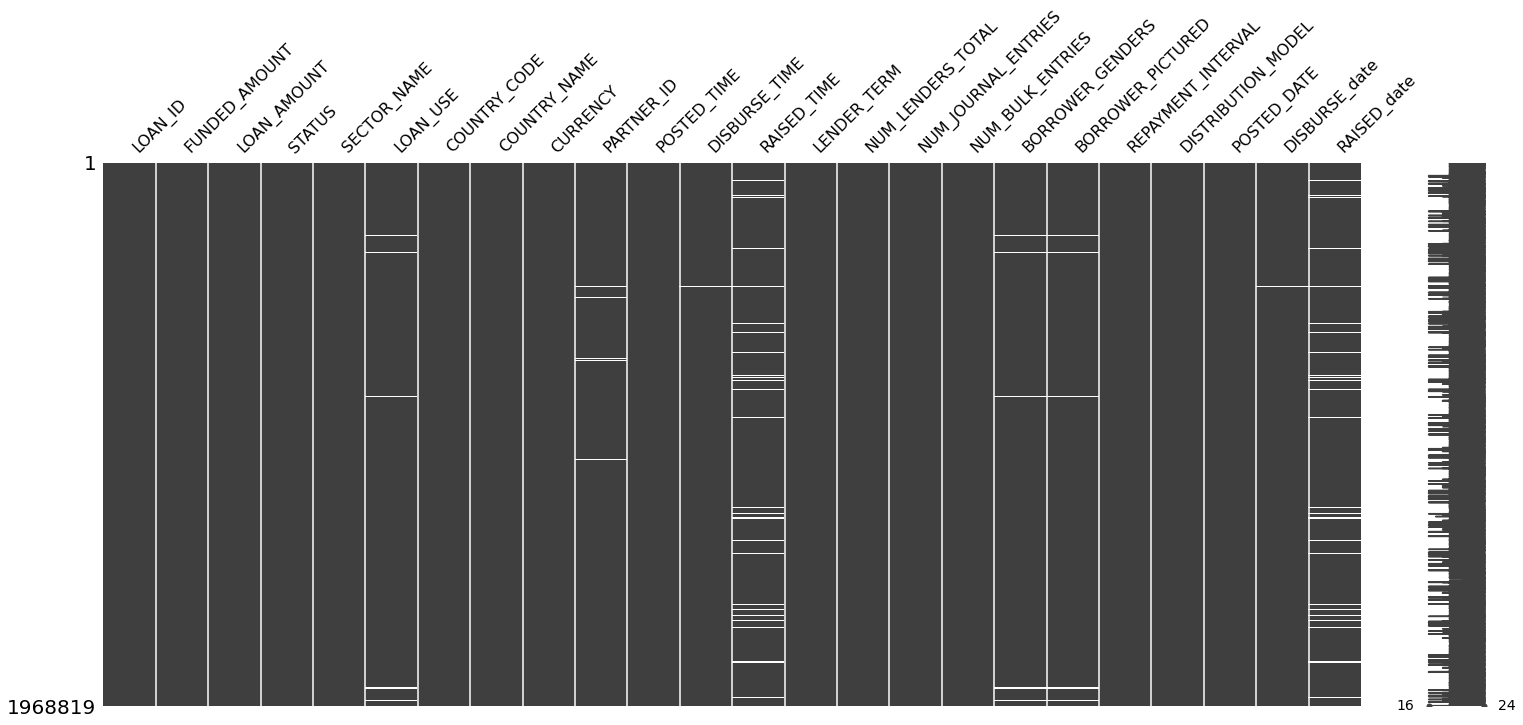

In [63]:
msno.matrix(loan_copy)

* Duplicates

In [64]:
## Nombre de données dupliqués sur la base des id
loan_copy.duplicated(subset=['LOAN_ID' ]).sum()

0

Ainsi, on voit que notre base de données ne comporte pas d'observations dupliquées. Autrement dit, chaque prêt est identifiable par son identifiant.

## Analyses spécifiques des variables
Dans cette partie, nous allons procéder aux éventuelles recodifications, renomages et traitement des variables qui présentent des incohérences. Dans un premier temps, nous allons nous intéresser aux variables catégorielles, par suite nous mettrons le focus sur les variables quantitatives.

### Traitement des variables qualitatives


In [184]:
loan_copy.columns

Index(['LOAN_ID', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS', 'SECTOR_NAME',
       'LOAN_USE', 'COUNTRY_CODE', 'COUNTRY_NAME', 'CURRENCY', 'PARTNER_ID',
       'POSTED_TIME', 'DISBURSE_TIME', 'RAISED_TIME', 'LENDER_TERM',
       'NUM_LENDERS_TOTAL', 'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES',
       'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL', 'POSTED_DATE', 'DISBURSE_date', 'RAISED_date',
       'taux_euro_x', 'verif', 'taux_euro_y', 'col'],
      dtype='object')

In [188]:
var_categoriel = ['STATUS','SECTOR_NAME','LOAN_USE','COUNTRY_NAME','CURRENCY','LENDER_TERM','BORROWER_GENDERS','BORROWER_PICTURED','REPAYMENT_INTERVAL','DISTRIBUTION_MODEL']

* ***Status du prêt*** : 
Cette variable représente la variable centrale de l'étude, car c'est elle que l'on cherchera à expliquer par la suite grâce aux modèles prédictifs que l'on mettra en oeuvre. De ce fait en accord avec la partie revue de littérature, après avoir présenté quelques statistiques brèves sur cette dernière, nous allons la recodifier tel que précédemment indiqué.

In [193]:
pd.crosstab(loan_copy.STATUS,'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
STATUS,
expired,4.612359
fundRaising,0.564044
funded,94.370585
refunded,0.453013


On voit bien que les prêts remboursés représentent l'origine de l'activité de kiva. En effet, ces derniers représentent `94,37%` des prêts de la structure. Le taux de défaut des clients de kiva sur la période d'étude est de `4,61%`. Ainsi, dans la partie modélisaiton afin de construire nos modèles prédicitfs sur cette variable, nous adopterons un comportment bien précis et concis en adéquation avec les études réalisées dans ce cas de figure.

Comme enseignement de la revue, nous allons à présent recodifier cette variable à fin d'avoir les entrepreneurs ayant fait défaut et ceux qui ne sont pas dans cette situation.

In [194]:
loan_copy['target'] = np.where(loan_copy['STATUS'] == 'expired', 0, 1)

In [207]:
labels = { 0 : 'defaut', 1 : 'succes'}
loan_copy['target'].apply(labels.get)
pd.crosstab(loan_copy['target'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
target,
0,4.612359
1,95.387641


Le taux de défaut global des entreprunteurs de kiva est de `4,61%`. Par la suite nous allons tirer un échantillon dans le groupe des entrepreneurs à succès pour construire les différents modèles.

* Secteur d'activité : 

In [213]:
print('Nous avons au total', len(loan_copy.SECTOR_NAME.unique()), " différentes secteurs d'activités supportées par le financement de la kiva",
     "\n En termes d'activités impactées par kiva, elles sont au nombres de : ",len(loan['ACTIVITY_NAME'].unique()),'activités.')

Nous avons au total 15  différentes secteurs d'activités supportées par le financement de la kiva 
 En termes d'activités impactées par kiva, elles sont au nombres de :  163 activités.


In [215]:
pd.crosstab(loan_copy['SECTOR_NAME'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
SECTOR_NAME,
Agriculture,25.468161
Arts,2.016742
Clothing,5.432749
Construction,1.218141
Education,3.498392
Entertainment,0.130992
Food,21.995877
Health,1.422223
Housing,5.255994


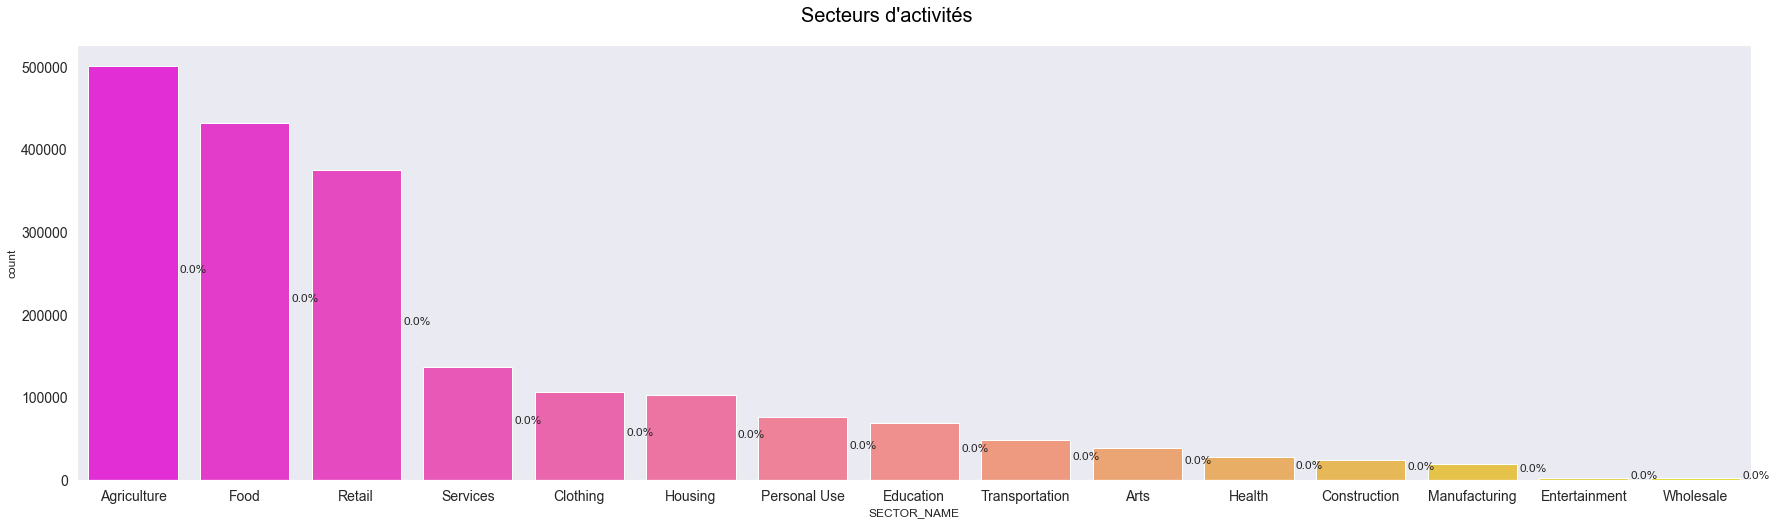

In [234]:
plt.figure(figsize=(30,8))
sns.set(rc={"axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
plt.gcf().text(.5, .93, "Secteurs d'activités", fontsize = 20, color='black' ,ha='center', va='center')
ax = sns.countplot(x=loan_copy['SECTOR_NAME'] , order =loan_copy['SECTOR_NAME'].value_counts().index , palette="spring")

total = len(loan_copy['SECTOR_NAME'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()


Etant donné que les pays sous-développés sont généralisé par la forte dépendance au secteur agricole, les données de kiva retrace parfaitement cette réalité. En effet, l'agriculture est le secteur d'activité le plus financé, à lui seul, il représente la destination de `25%` des prêts des entrepreneurs demandeurs de fonds à kiva. Ce dernier est sécondé par le secteur alimentaire qui représente prêt de `22%` des prêts de la structure. Le secteur manufacturié, du divertissement et des grossistes sont les moins représentés avec respectivement une part de `1,01%`, `0,13%` et `0,12%`.

Comme tenu du grand nombre de modalité de cette variable, nous allons la recoder. comme procédé de recodage, nous allons recoder tout en recherchant un équillibre au niveau des différentes modalités. Ainsi, les 3 modalités les plus représentatives seront laissées telles qu'elles ; les modalités `Clothing`; `Housing` et `Personnal Use` seront regroupées en la modalité `Bien_Menage`  et les autres variables serons dans la modalité autre.


In [154]:
Bien_Menage = ['Clothing','Housing','Personnal Use']
autre_secteur = ['Services','Education','Transportation','Arts','Health','Construction','Manufacturing','Entertainment','Wholesale']
conditions = [
    (loan_copy.SECTOR_NAME == 'Agriculture'),
    (loan_copy.SECTOR_NAME == 'Food'),
    (loan_copy.SECTOR_NAME == 'Retail'),
    (loan_copy.SECTOR_NAME == 'Clothing') | (loan.SECTOR_NAME == 'Housing') | (loan.SECTOR_NAME == 'Personal Use'),
    (loan_copy.SECTOR_NAME == 'Services') | (loan.SECTOR_NAME == 'Education') | (loan.SECTOR_NAME == 'Transportation') | (loan.SECTOR_NAME == 'Arts') | (loan.SECTOR_NAME == 'Health') | (loan.SECTOR_NAME == 'Services') | (loan.SECTOR_NAME == 'Construction') |  (loan.SECTOR_NAME == 'Manufacturing') | (loan.SECTOR_NAME == 'Entertainment') | (loan.SECTOR_NAME == 'Wholesale')
]
values = ['Agriculture','Food','Retail','Bien_Menage','autre_secteur']

In [155]:
loan_copy.SECTOR_NAME = np.select(conditions, values)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [153]:
pd.crosstab(loan_copy['SECTOR_NAME'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
SECTOR_NAME,
Agriculture,25.48
Arts,2.03
Clothing,5.40
Construction,1.21
Education,3.53
Entertainment,0.13
Food,21.99
Health,1.43
Housing,5.29


* **Monnaie utilisé** : 
Comme observé dans la partie analyse globale, la variable `taux de change` de la base de donnée présentait beaucoup de valeurs manquantes et ne repoindaient pas à nos attentes. Ainsi, nous avions opté de la supprimer. Nous allons ici completer notre base de donnée avec une variable taux d'échange qui sera issu d'une opération de webscrapping sur une page web. Lors de ce processus de recupération des informations online et del'ajout des ces derniers à notre base de donnée, nous allons explorer la variable `currency` en corrigeant les éventuelles erreures sur cette dernière.

#### conversion de la monnaie en euro
Dans l'optique de disposer de la variable taux d'échange qui nous permettra la conversion de toutes les monnaies présentes en **`euro (€)`** , nous faisons le scraping sur ce site: https://www.xe.com/en/currencytables/?from=EUR et utilisons `BeautifulSoup`pour avoir "comprendre" le texte ainsi scrappé.

In [174]:
import urllib
import bs4
from urllib import request

In [88]:
pip install bs4

  Using cached bs4-0.0.1.tar.gz (1.1 kB)
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1277 sha256=273315244fa783f4b59a6ddeae87ee351ab174e6adaffb92fd11277c7155bf73
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\75\78\21\68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [180]:
url = 'https://www.xe.com/en/currencytables/?from=EUR'

In [181]:
request_text = request.urlopen(url).read()
page = bs4.BeautifulSoup(request_text, 'lxml')
print(page.prettify())

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <!-- WARNING: Automated extraction of rates is prohibited under the Terms of Use. -->
  <script>
   window.pageProps = {"isMobile":false,"isTablet":false,"locale":"en","isXemtSupported":true,"countryCode":"FR","continentCode":"EU","surveyUrl":"https:\/\/www.surveymonkey.com\/r\/S2K2BR2","forceSurveyOpenInNewTab":false,"breadcrumbs":[{"text":"Home","url":"\/"},{"text":"Currency Tables","url":"https:\/\/www.xe.com\/currencytables\/"},{"text":"EUR - Euro","url":null}]};
  </script>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="en" name="lang"/>
  <meta content="This EUR currency table offers current and historic Euro rates compared to every world currency. For commercial purposes, get an automated currency feed through the XE Currency Data API." name="description"/>
  <link href="/manifest.json" rel="manifest"/>
  <link href="/favicon_white_180x180.ico" rel="icon" size

In [182]:
tableau = page.find('div', class_='historicalRateTable-wrap')
#print(tableau)

In [183]:
# Récupération des abréviations des différentes monnaies
CURRENCY = []
for currency in tableau.tbody.findAll('tr'):
    CURRENCY.append(currency.a.text)

In [184]:
# Récuration des taux de convertions
exchange = []
for taux in tableau.tbody.findAll('tr'):
    exchange.append(taux.find('td',class_='historicalRateTable-rateHeader').text)

In [185]:
#Assemblement de ces listes dans le tableau final
result_currency = pd.DataFrame(columns=['CURRENCY','taux_euro'])
result_currency['CURRENCY'] = CURRENCY
result_currency['taux_euro'] = exchange
result_currency.head()

,CURRENCY,taux_euro
0,USD,1.2112168832
1,EUR,1.0000000000
2,GBP,0.9070988285
3,INR,89.2599656876
4,AUD,1.6338255964


In [186]:
## Ajout des variables à la base de donnée
currency_database = pd.unique(loan_copy['CURRENCY']).tolist()
print(' Le nombre totale de monnaie est de : ',len(CURRENCY),
     '\n Le nombre de monnaie présent dans notre base de donnée est :',len(currency_database),
     "\n On s'attend à avoir exactement <<", len(CURRENCY) - len(currency_database),">> monnaies qui ne sont pas dans les deux listes." )

 Le nombre totale de monnaie est de :  167 
 Le nombre de monnaie présent dans notre base de donnée est : 77 
 On s'attend à avoir exactement << 90 >> monnaies qui ne sont pas dans les deux listes.


In [187]:
len(list(set(CURRENCY) - set(currency_database))) # La taille de la différence entre les deux listes.

92

On constate qu'il y'a deux monnaies présentent dans notre base de données qui ne sont pas dans la liste complètes de monnaies. Ainsi, on présuppose
que ces dernieres ont été mal libelées. Identifions ces monnaies.

In [188]:
# Boucle pour identifier les libelés des monnnaies érronés.
currency_error = []
for i in currency_database:
    if i not in CURRENCY:
        currency_error.append(i)
        print(i)

SSP
ZMK


A l'observation de ces derniers, on peut supposer que `ZMK` correspond plutôt à `ZMW` qui est la monnaie de `Zambian Kwacha` sur le site de référence. Afin de s'affranchir
de toute confusion nous allons identifer les pays qui ont ces monnaies, se reférer à la table et parsuite les remplacer.

In [189]:
# Recherhe de l'index des pays ayant une monnaie mal renseignée
index_erreur = []
for j in range(len(loan_copy.COUNTRY_NAME)):
    for k in range(len(currency_error)):
        if currency_error[k] == loan_copy.CURRENCY[j]:
            index_erreur.append(loan_copy.COUNTRY_NAME[j])

KeyError: 52

In [190]:
pays_1 = index_erreur[0]
for i in range(len(index_erreur)):
    if index_erreur[i]!=pays_1:
        print('Les pays ayant un libelé de monnaie mal renseignés sont : ', 
              '\n * ',pays_1,
              '\n * ',index_erreur[i])
        break

IndexError: list index out of range

Ainsi, on voit bien que les deux pays pour lesquels les monnais on été mal libelés sont le `South Sudan` et la `Zambia`. Ainsi, on voit bien que la précédente inturtion était correcte. En outre il importe de souligné l'importance d'avoir fait ce travail, car si on supprimait ces pays, on devait impiété négativement sur la performance du modèle à mettre sur-pied.

Dans le site de référence, la monnaie du `South Sudan` est appelé `Sudanese Pound` et est abbrégé `SDG`. Par suite, dans notre base de donnée, nous allons effectuer les changements suivants sur la variable currency :
* `SSP` en `SDG`
* `ZMK` en `ZMW`

In [191]:
print("On vérifie si les libéles 'SDG' et 'ZMK' était déjà dans la liste de la base de données. :",
      '\n*  SDG in list : ', 'SDG' in currency_database,
     '\n*  ZMW in list : ', 'ZMK' in currency_database)

On vérifie si les libéles 'SDG' et 'ZMK' était déjà dans la liste de la base de données. : 
*  SDG in list :  True 
*  ZMW in list :  True


Ainsi on voit qu'effectivement les deux libélés étaient déjà présents dans la base de donnée, ces erreurs pourraient probablement avoir pour
origine une erreur de saisit. 

In [192]:
# Remplace les libelés de monnaie de la base donnée
loan_copy['CURRENCY'] = loan_copy['CURRENCY'].replace({'SSP': 'SDG', 'ZMK': 'ZMW'})

In [193]:
new_currency_database = pd.unique(loan_copy['CURRENCY']).tolist()

In [194]:
len(new_currency_database)

75

A ce niveau, on est bien certain que tous les libelés de monnaies présents dans la base de données le sont également dans le libelé au niveau internationnal.

Nous allons ajouter la base de donnée scrapper, contenant le taux de change des monnaies par rapport à l'euro à notre base de donnée.

In [195]:
# Conversion de la colonne new_currency_database en base de donnée
df1 = pd.DataFrame({'col':new_currency_database})
# Fusion des bases de données pour en retenir uniquement les monnaies des présentes dans la base de données
currency = pd.merge(result_currency, df1, how = 'right', left_on = ['CURRENCY'],right_on = ['col']).sort_values('CURRENCY')

In [196]:
# Ajout de la variable taux de change à la base de données
loan_copy = pd.merge(loan_copy, currency, on='CURRENCY', how='outer')

Maintenant que nous avons le taux de conversion des différentes monnaies à l'euro, nous allons diviser toutes les variables
concernant les montant libélé en monnaies nationales par l'euro. Rappelons que l'importance de démarche réside dans la facilité des
interprétations qu'elle procure. En outre, grâce à cette conversion, les interprétations, analyses et comparaisons serons beacoup
plus facilent et clairent.

* **L'utilisation du prêt** :

In [253]:
loan_copy['LOAN_USE'].unique()

['to buy more sacks of charcoal to sell.', 'to buy ingredients such as sugar, coconut mil..., 'to buy more supplies to improve her store.', 'to buy additional feed for her business.', 'to build a sanitary toilet for her family.', ..., 'to pay for stock of solar lights and cell pho..., 'to maintain a stock of solar lights and cell ..., 'to pay for a large solar system and delivery ..., 'purchase solar lighting products for sale to ..., 'To buy more clothes, blankets and other goods...]
Length: 1195466
Categories (1195465, object): ['to buy more sacks of charcoal to sell.', 'to buy ingredients such as sugar, coconut mil..., 'to buy more supplies to improve her store.', 'to buy additional feed for her business.', ..., 'to maintain a stock of solar lights and cell ..., 'to pay for a large solar system and delivery ..., 'purchase solar lighting products for sale to ..., 'To buy more clothes, blankets and other goods...]

* **Pays de destination du prêt** : 

In [164]:
pd.crosstab(loan_copy['COUNTRY_NAME'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
COUNTRY_NAME,
Afghanistan,0.09
Albania,0.25
Armenia,0.86
Azerbaijan,0.51
Bangladesh,0.00
...,...
Vietnam,1.69
Virgin Islands,0.00
Yemen,0.18


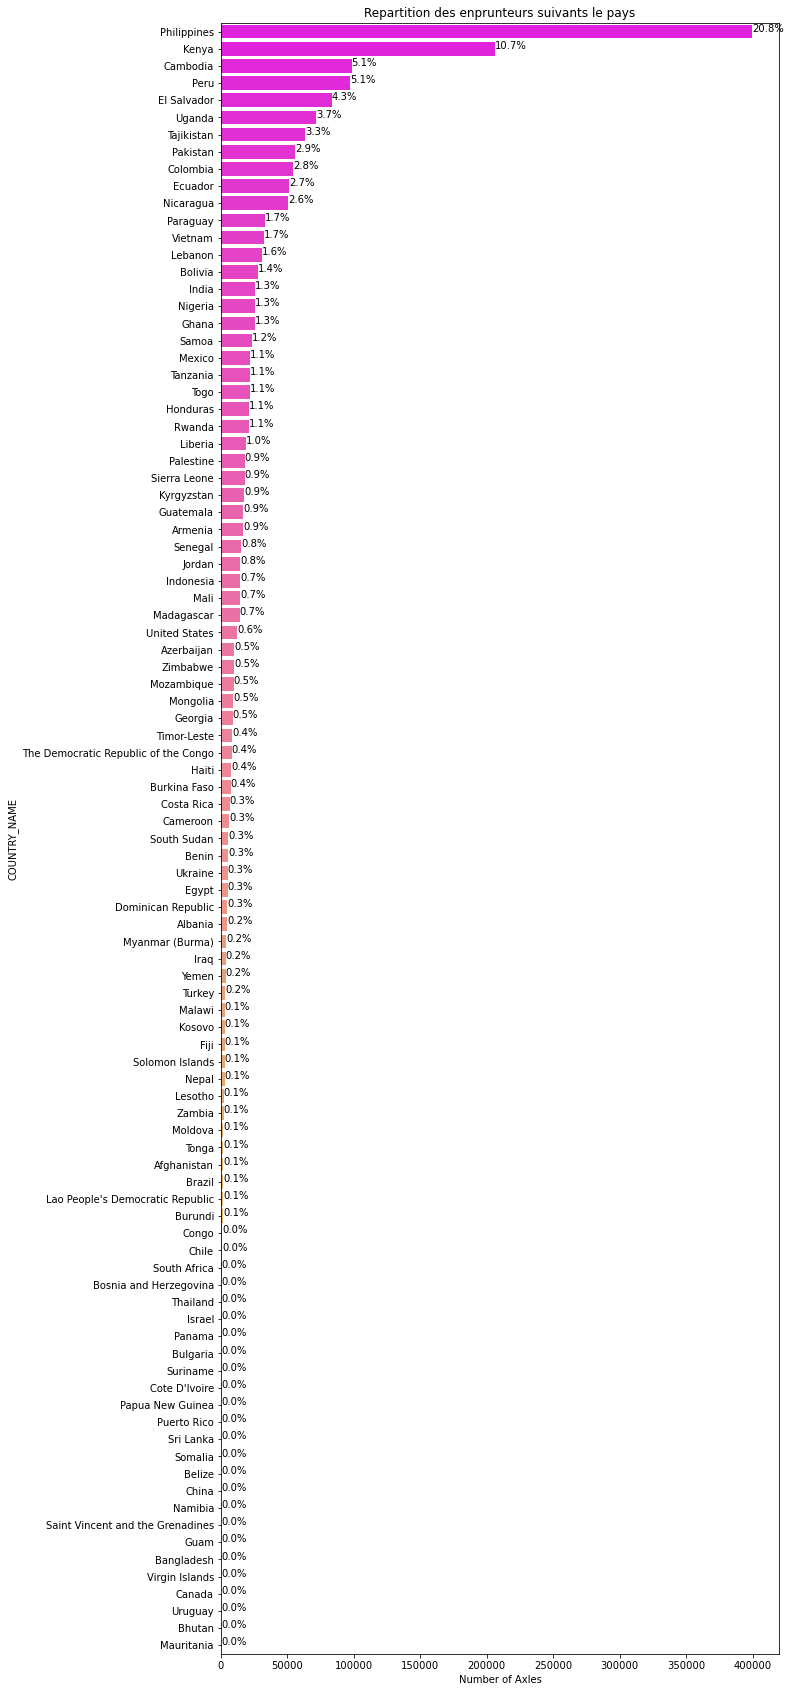

In [170]:
plt.figure(figsize=(10,30))
ax = sns.countplot(y="COUNTRY_NAME", data=loan_copy, order =loan_copy['COUNTRY_NAME'].value_counts().index , palette="spring")
#ax = sns.countplot(x=loan_copy['SECTOR_NAME'] )

plt.title('Repartition des enprunteurs suivants le pays')
plt.xlabel('Number of Axles')

total = len(loan_copy['COUNTRY_NAME'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

A l'observation de ce graphique, il en ressort que sur la période d'étude, l'activité de kiva à touché **`95 pays`**. Parmi ces pays, ceux ayant été les plus dynamiques sont `Philippines`, `Kenya`, `Cambodia`, `peru` et `El Salvador`. De ce fait,ces 5 pays sont les premiers ayant le plus grand nombre d'entrepreneurs qui ont kiva comme source de financement. Par suite, dans l'optique d'avoir une vision beaucoup plus de l'impact du travail de kiva, nous opté pour une présentation graphique beaucoup plus informative. En effet, nous nous donnons pour ambittion de faire une réprésentation spatiale des pays en utilisant leurs coordonnés géographiques (longitude, latitude). Cette représentation présente le fort intérêt de nous permettre de faire une recodification de la variable en continent, ainsi, elle pourra être pris en compte dans la modélisation. 

Pour parvenir à la réalisaiton de ce challenge, nous allons, dans un premier temps rechercher l'information en ligne sur les coordonnées géographiques des différents pays. Par suite, nous utiliserons les bibliothèques adéquates pour faire la représentation graphique. Les informations à scrapper sont disponible à l'adresse suivante : https://developers.google.com/public-data/docs/canonical/countries_csv.

In [177]:
url_pays = 'https://developers.google.com/public-data/docs/canonical/countries_csv'
request_text = request.urlopen(url_pays).read()
pays = bs4.BeautifulSoup(request_text, 'lxml')
print(pays.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta content="721724668570-nbkv1cfusk7kk4eni4pjvepaus73b13t.apps.googleusercontent.com" name="google-signin-client-id"/>
  <meta content="profile email" name="google-signin-scope"/>
  <meta content="Google Developers" property="og:site_name"/>
  <meta content="website" property="og:type"/>
  <meta content="#3f51b5" name="theme-color"/>
  <meta charset="utf-8"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link crossorigin="use-credentials" href="/_pwa/developers/manifest.json" rel="manifest"/>
  <link crossorigin="" href="//www.gstatic.com" rel="preconnect"/>
  <link crossorigin="" href="//fonts.gstatic.com" rel="preconnect"/>
  <link crossorigin="" href="//fonts.googleapis.com" rel="preconnect"/>
  <link crossorigin="" href="//apis.google.com" rel="preconnect"/>
  <link crossorigin="" href="//www.google-analytics.com" rel="preconnect"/>
  <link h

In [23]:
tableau = page.find('div', class_='historicalRateTable-wrap')
#print(tableau)

In [151]:
# Récupération des abréviations des différentes monnaies
CURRENCY = []
for currency in tableau.tbody.findAll('tr'):
    CURRENCY.append(currency.a.text)

In [173]:
len(loan_copy['COUNTRY_CODE'].unique())

95

In [246]:
np.select(conditions, values).shape

(1968819,)

* **Sexe de l'emprunteur**

In [42]:
len(pd.unique(loan_copy['BORROWER_GENDERS']))

24167

On constate que la variable sexe a 24 167 modalités. Nous allons comprendre cette erreur et la corriger car cette variable a un grand pouvoir informationnel.

In [36]:
pd.crosstab(loan_copy['BORROWER_GENDERS'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
BORROWER_GENDERS,
female,63.525647
"female, female",1.401906
"female, female, female",1.400332
"female, female, female, female",1.080292
"female, female, female, female, female",1.076077
...,...
"male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male",0.000051
"male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male",0.000102
"male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, female, male, male, male",0.000051


In [45]:
pd.crosstab(loan_copy['BORROWER_GENDERS'].isna(),'freq')

col_0,freq
BORROWER_GENDERS,
False,1923203
True,45616


Pour cette variable, nous avons 45 616 observations non renseignées. Etant donnée la distribution des erreurs au niveau des observations renseignées, nous soupçonnons que ces dernieres doivent contenir de l'information sur le mécanisme générateur des valeurs manquantes. Ainsi, pour bien comprendre ce mecanisme générateur de ces valeurs manquantes et les erreurs sur les modalités de cette variable, nous d'abord procéder à une bonne visualisation beaucoup plus large de cette variable.

In [63]:
# Configuration pour permettre l'affichage de plusieurs lignes
pd.set_option('display.max_rows', None)

In [66]:
loan_copy['BORROWER_GENDERS'][:100]

0                                                female
1                                                female
2                                                female
3                                                female
4                                                  male
5                                                  male
6                                                female
7                                                female
8                                                female
9                        female, female, female, female
10                                               female
11                                               female
12                                               female
13                                               female
14    female, female, female, female, female, female...
15                               female, female, female
16                                               female
17                   female, female, male, femal

In [67]:
pd.reset_option('^display.', silent=True) # Remet l'option d'affichage par défaut

Comme on peut le voir avec cette sortie, les soupçons précédement émis s'avèrent fausses. En effet, les observations autour de la valeurs manquantes sont très bien renseignées. Ceci ne nous renseigne pas spécifiquement sur l'origine de ces dernieres. Ainsi, par suite, nous allons les supprimer par manque d'informations additionnelles pour procéder à une éventuelle imputation. En outre, concernant les observations renseignées, ces derniers aussi posent un problème. En effet, comme on peut l'observer à les lignes `17`, `23` et `54`, une observation erronée contient à la fois la modalité **homme** et **femme**. Afin d'être cohérent dans notre démarche, nous allons uniquement retenir la première occurence. C'est à dire pour l'observation les observations susmentionnées, nous allons en retenir respectivement : `female`, `male`, `male`.

Nous allons dans la suite, dans un premier temps supprimer les observations ayant les valeurs manquantes pour la variable `Gender` sur la base totale. Ensuite, nous  allons procéder à la correction des modalités de cette variable.

In [115]:
# Suppression des missings values
loan_copy = loan_copy.dropna(how='all', subset=['BORROWER_GENDERS'])

In [116]:
sexe = loan_copy['BORROWER_GENDERS'].tolist()
len(sexe); sexe[0].split(',')[0]

'female'

In [118]:
# Boucle qui permet de recupérer le premiere la premiere occurence de chaque modalité
sexe_correct = []
for i in range(len(sexe)):
    sexe_correct.append(sexe[i].split(',')[0])

In [120]:
loan_copy['BORROWER_GENDERS'] = sexe_correct

In [121]:

print(' Le nombre de modalité de la variable obtenu est de : ',len(loan_copy['BORROWER_GENDERS'].unique()),
      "\n Le nombre d'observation de la variable est de :  ",len(loan_copy['BORROWER_GENDERS']))

 Le nombre de modalité de la variable obtenu est de :  3 
 Le nombre d'observation de la variable est de :   1923203


In [126]:
pd.crosstab(loan_copy['BORROWER_GENDERS'],'freq')

col_0,freq
BORROWER_GENDERS,
female,1474910
male,448257
unspecified,36


Comme on peut le constater, il y'a encore une modalité incorrecte à savoir `unspecified`. Nous allons encore supprimer toutes les observation de la base de donnée correspond à cette observation.

In [128]:
loan_copy.drop(loan_copy.index[loan_copy['BORROWER_GENDERS'] == 'unspecified'], inplace = True)

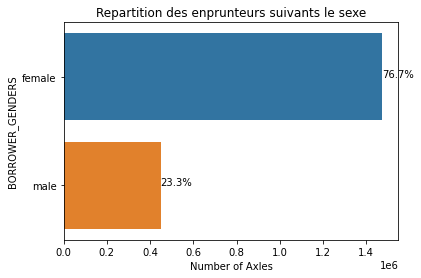

In [134]:
ax = sns.countplot(y="BORROWER_GENDERS", data=loan_copy)
plt.title('Repartition des enprunteurs suivants le sexe')
plt.xlabel('Number of Axles')

total = len(loan_copy['BORROWER_GENDERS'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Comme l'illustre cette sortie graphique, on voit bien que la plupart des entrepreneurs des pays sous dévéloppés qui empruntent des fonds d'investissements chez kiva sont les femmes. Ceci est en parfaite adéquation avec les résultats du secteur d'activités où il en est ressorti que le secteur le plus impacté par les prêts par les prêts de kiva est le `secteur agricole`. Car, dans ces pays, les femmes sont généralement plus présentes dans le secteur agricole.

* **La photo de l'emprunteur est elle disponible ?**

In [136]:
pd.crosstab(loan_copy['BORROWER_PICTURED'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1)

col_0,freq
BORROWER_PICTURED,
"false, false, false, true, true, true, true, true, false, true, true, false, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000052
"false, false, false, true, true, true, true, true, true, true, false, true, true, true, true, true, true, true, true, true, false, true, true, true, true, true, true, true, true, true, true",0.000052
"false, false, false, true, true, true, true, true, true, true, true, false, true, true, true, true, true, true, true, true",0.000052
"false, false, false, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, false, true, true, true, false, false, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000052
"false, false, false, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000052
...,...
"true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000156
"true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000104
"true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000468


Nous sommes encore confronté à la même difficulté que précédemment. Cette variable sera très importante pour notre modèle de prédiction, car elle permettra de savoir si le fait pour un entrepreneur de donner sa photo est gage de bonne conduite de sa part. Ainsi, nous allons nous attelé à corriger cette variables avec les considérations précédemment énoncées. A savoir ne retenir que les premières occurences des modalités et étandre la suppression des missings values à toute la base de donnée.

In [ ]:
loan_copy['BORROWER_PICTURED']

In [115]:
# Suppression des missings values
loan_copy = loan_copy.dropna(how='all', subset=['BORROWER_GENDERS'])

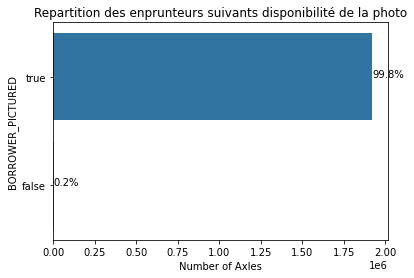

In [150]:
photo = loan_copy['BORROWER_PICTURED'].tolist()
# Boucle qui permet de recupérer le premiere la premiere occurence de chaque modalité
photo_correct = []
for i in range(len(photo)):
    photo_correct.append(photo[i].split(',')[0])

loan_copy['BORROWER_PICTURED'] = photo_correct

ax = sns.countplot(y="BORROWER_PICTURED", data=loan_copy)
plt.title('Repartition des enprunteurs suivants disponibilité de la photo')
plt.xlabel('Number of Axles')

total = len(loan_copy['BORROWER_PICTURED'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Comme illsutré par le graphique, seulement `0,2%` des emprunteurs de kiva n'ont pas envoyer de photo leur photo. Ainsi, on peut déjà présumé que cette variable ne serait pas un bon prédicteur car ne permet pas de discriminer les profils des defauts et bons des entrepreneurs. Toutes fois dans la suite, des analyses appropriées seront menées à cette fin.

* **Intervalle de remboursement**

In [162]:
pd.crosstab(loan_copy['REPAYMENT_INTERVAL'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
REPAYMENT_INTERVAL,
bullet,9.07
irregular,4.34
monthly,86.58


Les prêts de kiva sont le plus fréquemment remboursé à intervalle mensuels, soit `86,58%`. La modalité **`bullet`** représente les autres types de remboursement à fréquence régulières qui ne sont pas mensuels. Et ces derniers sont effectués par `9,07%` des entrepreneurs.

* **Model de distribution du prêt** : 
Il est important de noter que pour bénéficier d'un prêt en provenance de kiva, soit l'entrepreneur fait recours à une structure partenaire, soit elle demande directement auprès de l'organisation. Ainsi, cette variable permet de capter le moyen d'obtention du prêt.

In [163]:
pd.crosstab(loan_copy['DISTRIBUTION_MODEL'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
DISTRIBUTION_MODEL,
direct,1.03
field_partner,98.97


Comme l'illustre cette sortie, la presque totalité des prêts occtroiyés par kiva sont faits par leurs strutures partenaires qui sont présents qu niveau local dans l'ensmebles des pays membres.

## Traitement des variables quantitatives

Pour chacune de ces variables, nous identifierons s'il s'agit d'un montant en unité monétaire ou pas. Cette connaissance nous ai fondalement car grâce à elle, on saura si une conversion de la dite variable en `euro` est nécessaire.

In [17]:
var_quanti = ['FUNDED_AMOUNT','LOAN_AMOUNT','PARTNER_ID','LENDER_TERM','NUM_LENDERS_TOTAL','NUM_JOURNAL_ENTRIES','NUM_BULK_ENTRIES']
var_date = ['POSTED_DATE', 'DISBURSE_date', 'RAISED_date']

#### Convertion variables monétaires en euro
les variables à convertir en monnaie sont : Funded amount, Loan amount. Pour la conversion, nous allons diviser chacune de ces variable par le taux en euro. En effet, ces taux ont été pris au certain. C'est-à-dire, que combien d'unités de ces monnaies seront nécessaires pour obetenir un euro.

In [197]:
loan_copy['FUNDED_AMOUNT'] = loan_copy['FUNDED_AMOUNT'] / loan_copy['taux_euro']

TypeError: unsupported operand type(s) for /: 'float' and 'str'

In [205]:
float(loan_copy['taux_euro'].values)

TypeError: only size-1 arrays can be converted to Python scalars

In [69]:
loan_copy[var_quanti].describe() # Description des variables quantitatives de la base de données.

,FUNDED_AMOUNT,LOAN_AMOUNT,PARTNER_ID,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES
count,1.968819e+06,1.968819e+06,1.948516e+06,1.968795e+06,1.968819e+06,1.968819e+06,1.968819e+06
mean,7.794666e+02,8.235622e+02,1.659668e+02,1.314693e+01,2.142341e+01,1.561344e+00,1.153008e+00
std,1.522751e+03,1.602688e+03,1.047908e+02,7.304365e+00,4.155283e+01,1.093998e+00,5.257283e-01
min,0.000000e+00,2.500000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.750000e+02,2.750000e+02,1.080000e+02,8.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00
50%,5.000000e+02,5.000000e+02,1.450000e+02,1.300000e+01,1.400000e+01,1.000000e+00,1.000000e+00
75%,9.000000e+02,9.750000e+02,1.850000e+02,1.400000e+01,2.600000e+01,2.000000e+00,1.000000e+00
max,5.000000e+05,5.000000e+05,6.140000e+02,1.950000e+02,1.526500e+04,1.260000e+02,6.300000e+01


Les princiaples enseingnements du tableau :
  * **FUNDED_AMOUNT** : 
Le minimum des montants empruntés auprès de kiva durant la période d'analyse est de 0. Ce qui est incohérent car un entrepreneur rationel n'irait pas
prêté un tel montant. Ainsi, nous considérerons ces observations comme étant à problème et nous allons litéralement les supprimer.

In [75]:
pd.crosstab(loan_copy.CURRENCY,'freq')

col_0,freq
CURRENCY,
AFN,1958
ALL,4879
AMD,10403
AZN,8039
BAM,608
...,...
YER,4235
ZAR,597
ZMK,51


# Prediction du risque de défaut des clients d'une microfinance à but non lucratif : Cas de Kiva